#### 迷你案例：用人脸识别看PCA降维后的信息保存量

In [7]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data

In [9]:
print(faces.data.shape) # 打印原始数据特征
# 行是样本
# 列是样本相关的所有特征

(1348, 2914)


In [12]:
print(faces.images.shape)
# 1348 是矩阵中图像的个数
# 62 是每个图像的特征矩阵的行
# 47 是每个图像的特征矩阵的列

(1348, 62, 47)


#### 重要接口inverse_transform
神奇的接口inverse_transform，可以将我们归一化，标准化，甚至做过哑变
量的特征矩阵还原回原始数据中的特征矩阵，这几乎在向我们暗示，任何有inverse_transform这个接口的过程都
是可逆的。PCA应该也是如此。在sklearn中，我们通过让原特征矩阵X右乘新特征空间矩阵V(k,n)来生成新特征矩
阵X_dr，那理论上来说，让新特征矩阵X_dr右乘V(k,n)的逆矩阵 ，就可以将新特征矩阵X_dr还原为X

In [16]:
pca = PCA(150)#实例化
# pca = pca.fit(X) # 训练
X_dr = pca.fit_transform(X)
V = pca.components_ # V向量是新矩阵
print(X_dr.shape)
X_inverse = pca.inverse_transform(X_dr)
print(X_inverse.shape) # 对数据进行还原，对降维数据进行逆转

(1348, 150)
(1348, 2914)


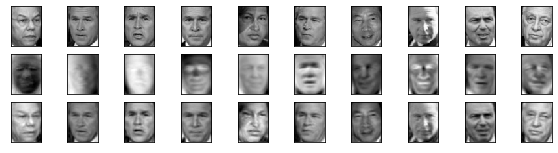

In [17]:
#可视化（2，10 代表着2行，每行10个图）, figsize指定画布大小，subpolt_kw 代表着坐标轴(置空坐标轴)
fig,ax = plt.subplots(3,10,figsize=(10,2.5),subplot_kw={"xticks":[],"yticks":[]})
# fig 是画布 ax是每一子图
for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(V[i].reshape(62,47),cmap="binary_r")
    ax[2,i].imshow(X_inverse[i].reshape(62,47),cmap="binary_r")

结论：这两组数据可视化后，由降维后再通过inverse_transform转换回原维度的数据画出的图像和原数
据画的图像大致相似，但原数据的图像明显更加清晰。这说明，inverse_transform并没有实现数据的完全逆转。
这是因为，在降维的时候，部分信息已经被舍弃了，X_dr中往往不会包含原数据100%的信息，所以在逆转的时
候，即便维度升高，原数据中已经被舍弃的信息也不可能再回来了。所以，降维不是完全可逆的。
Inverse_transform的功能，是基于X_dr中的数据进行升维，将数据重新映射到原数据所在的特征空间中，而并非
恢复所有原有的数据。但同时，我们也可以看出，降维到300以后的数据，的确保留了原数据的大部分信息，所以
图像看起来，才会和原数据高度相似，只是胡了一点